In [1]:
import nltk

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer

In [3]:
example_text="Hello Mr. Smith, how are you doing today? The weather is great and Python is awesome. The sky is blue"

In [4]:
print(sent_tokenize(example_text))

['Hello Mr. Smith, how are you doing today?', 'The weather is great and Python is awesome.', 'The sky is blue']


In [5]:
words=word_tokenize(example_text)

In [6]:
for i in word_tokenize(example_text):
    print(i)

Hello
Mr.
Smith
,
how
are
you
doing
today
?
The
weather
is
great
and
Python
is
awesome
.
The
sky
is
blue


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
stop_words=list(stopwords.words("english"))
stop_words.append("The")

In [9]:
print(words)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'blue']


In [10]:
x=[]
for w in words:
    if w not in stop_words:
        x.append(w)

In [11]:
y=[]
y=[w for w in words if w not in stop_words]

In [12]:
y

['Hello',
 'Mr.',
 'Smith',
 ',',
 'today',
 '?',
 'weather',
 'great',
 'Python',
 'awesome',
 '.',
 'sky',
 'blue']

In [13]:
from nltk.stem import PorterStemmer

In [14]:
ps=PorterStemmer()
example_words=["python","pythoner","pythoning","pythoned","pythonly"]

In [15]:
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [16]:
new_text="It is very important to be pythonly while you are pythoning with python. All pythoners have pythoned poorly atleast once"

In [17]:
words =word_tokenize(new_text)

In [18]:
for w in words:
    print(ps.stem(w))

It
is
veri
import
to
be
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
atleast
onc


In [19]:
import nltk
from nltk.corpus import state_union

In [20]:
train_text=state_union.raw("2005-GWBush.txt")
sample_text=state_union.raw("2006-GWBush.txt")

In [21]:
custom_sent_tokenizer=PunktSentenceTokenizer(train_text)
tokenized=custom_sent_tokenizer.tokenize(sample_text)

In [22]:
def process_content():
    try:
        for i in tokenized:
            words=nltk.word_tokenize(i)
            tagged=nltk.pos_tag(words)
            print(tagged)
    except Exception as e:
        print(str(e))

# Chunking

In [23]:
# POS tag list:

# CC	coordinating conjunction
# CD	cardinal digit
# DT	determiner
# EX	existential there (like: "there is" ... think of it like "there exists")
# FW	foreign word
# IN	preposition/subordinating conjunction
# JJ	adjective	'big'
# JJR	adjective, comparative	'bigger'
# JJS	adjective, superlative	'biggest'
# LS	list marker	1)
# MD	modal	could, will
# NN	noun, singular 'desk'
# NNS	noun plural	'desks'
# NNP	proper noun, singular	'Harrison'
# NNPS	proper noun, plural	'Americans'
# PDT	predeterminer	'all the kids'
# POS	possessive ending	parent\'s
# PRP	personal pronoun	I, he, she
# PRP$	possessive pronoun	my, his, hers
# RB	adverb	very, silently, 
# RBR	adverb, comparative	better
# RBS	adverb, superlative	best
# RP	particle	give up
# TO	to	go 'to' the store.
# UH	interjection	errrrrrrrm
# VB	verb, base form	take
# VBD	verb, past tense	took
# VBG	verb, gerund/present participle	taking
# VBN	verb, past participle	taken
# VBP	verb, sing. present, non-3d	take
# VBZ	verb, 3rd person sing. present	takes
# WDT	wh-determiner	which
# WP	wh-pronoun	who, what
# WP$	possessive wh-pronoun	whose
# WRB	wh-abverb	where, when

In [24]:
# Modifiers:

# {1,3} = for digits, u expect 1-3 counts of digits, or "places"
# + = match 1 or more
# ? = match 0 or 1 repetitions.
# * = match 0 or MORE repetitions
# $ = matches at the end of string
# ^ = matches start of a string
# | = matches either/or. Example x|y = will match either x or y
# [] = range, or "variance"
# {x} = expect to see this amount of the preceding code.
# {x,y} = expect to see this x-y amounts of the precedng code

# Identifiers:

# \d = any number
# \D = anything but a number
# \s = space
# \S = anything but a space
# \w = any letter
# \W = anything but a letter
# . = any character, except for a new line
# \b = space around whole words
# \. = period. must use backslash, because . normally means any character.


In [25]:
def process_content1():
    try:
        for i in tokenized:
            words=nltk.word_tokenize(i)
            tagged=nltk.pos_tag(words)
            chunkGram =r"""Chunk: {<RB.?>*<VB.?>*<NNP><NN>?}"""
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(tagged)
            chunked.draw()
    except Exception as e:
        print(str(e))

# Chinking

In [26]:
def process_content2():
    try:
        for i in tokenized[5:]:
            print(i)
            words=nltk.word_tokenize(i)
            tagged=nltk.pos_tag(words)
            chunkGram=r"""Chunk: {<.*>+} 
                        }<VB.?|IN|DT>+{ """
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(tagged)
#             chunked.draw()
    except Exception as e:
        print(str(e))

In [27]:
sentences=nltk.sent_tokenize(train_text)

In [28]:
sentences[1]

'And tonight that is a privilege we share with newly-elected leaders of Afghanistan, the Palestinian Territories, Ukraine, and a free and sovereign Iraq.'

In [29]:
tokenized[1]

'Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.'

# Name Entity Recognition

In [30]:
def process_content3():
    try:
        for i in tokenized:
            words=nltk.word_tokenize(i)
            tagged=nltk.pos_tag(words)
            namedEnt=nltk.ne_chunk(tagged)
            print(namedEnt)
    except Exception as e:
        print(str(e))

# Lemmatizing

#### Most of the times better stemming

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('cats'))
print(lemmatizer.lemmatize('cacti'))
print(lemmatizer.lemmatize('geese'))
print(lemmatizer.lemmatize('rocks'))
print(lemmatizer.lemmatize('python'))
print(lemmatizer.lemmatize('better',pos="a"))
print(lemmatizer.lemmatize('best',pos="a"))
print(lemmatizer.lemmatize('run'))
print(lemmatizer.lemmatize('better','v'))



cat
cactus
goose
rock
python
good
best
run
better


# NLTK Corpora

In [33]:
import sys
print(sys.path)

['', '/Users/paras', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/aeosa', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/paras/.ipython']


In [34]:
print(nltk.__file__)

/anaconda3/lib/python3.7/site-packages/nltk/__init__.py


In [35]:
from nltk.corpus import gutenberg

In [36]:
sample=gutenberg.raw("bible-kjv.txt")

In [37]:
tok=sent_tokenize(sample)

In [38]:
print(tok[5:15])

['1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.', '1:8 And God called the firmament Heaven.', 'And the evening and the\nmorning were the second day.', '1:9 And God said, Let the waters under the heaven be gathered together\nunto one place, and let the dry land appear: and it was so.', '1:10 And God called the dry land Earth; and the gathering together of\nthe waters called he Seas: and God saw that it was good.', '1:11 And God said, Let the earth bring forth grass, the herb yielding\nseed, and the fruit tree yielding fruit after his kind, whose seed is\nin itself, upon the earth: and it was so.', '1:12 And the earth brought forth grass, and

# WordNet

In [39]:
from nltk.corpus import wordnet

In [40]:
syns=wordnet.synsets("program")
syns

[Synset('plan.n.01'),
 Synset('program.n.02'),
 Synset('broadcast.n.02'),
 Synset('platform.n.02'),
 Synset('program.n.05'),
 Synset('course_of_study.n.01'),
 Synset('program.n.07'),
 Synset('program.n.08'),
 Synset('program.v.01'),
 Synset('program.v.02')]

In [41]:
#synset
print(syns[0].name())

plan.n.01


In [42]:
# just the word
print(syns[0].lemmas()[0].name())

plan


In [43]:
#definition
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [44]:
#examples
syns[0].examples()

['they drew up a six-step plan', 'they discussed plans for a new bond issue']

In [45]:
synonyms =[]
antonyms=[]

In [46]:
for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            print(l.antonyms()[0])
            antonyms.append(l.antonyms()[0].name())

Lemma('evil.n.03.evil')
Lemma('evil.n.03.evilness')
Lemma('bad.n.01.bad')
Lemma('bad.n.01.badness')
Lemma('bad.a.01.bad')
Lemma('evil.a.01.evil')
Lemma('ill.r.01.ill')


In [47]:
synonyms

['good',
 'good',
 'goodness',
 'good',
 'goodness',
 'commodity',
 'trade_good',
 'good',
 'good',
 'full',
 'good',
 'good',
 'estimable',
 'good',
 'honorable',
 'respectable',
 'beneficial',
 'good',
 'good',
 'good',
 'just',
 'upright',
 'adept',
 'expert',
 'good',
 'practiced',
 'proficient',
 'skillful',
 'skilful',
 'good',
 'dear',
 'good',
 'near',
 'dependable',
 'good',
 'safe',
 'secure',
 'good',
 'right',
 'ripe',
 'good',
 'well',
 'effective',
 'good',
 'in_effect',
 'in_force',
 'good',
 'good',
 'serious',
 'good',
 'sound',
 'good',
 'salutary',
 'good',
 'honest',
 'good',
 'undecomposed',
 'unspoiled',
 'unspoilt',
 'good',
 'well',
 'good',
 'thoroughly',
 'soundly',
 'good']

In [48]:
antonyms

['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']

In [49]:
w1=wordnet.synset("ship.n.01")
w2=wordnet.synset("boat.n.01")

In [50]:
print(w1.wup_similarity(w2))

0.9090909090909091


In [51]:
w1=wordnet.synset("ship.n.01")
w2=wordnet.synset("car.n.01")

In [52]:
print(w1.wup_similarity(w2))

0.6956521739130435


# Text Classification

In [53]:
import random
from nltk.corpus import movie_reviews

In [54]:
documents=[(list(movie_reviews.words(fileid)),category)
          for category in movie_reviews.categories()
          for fileid in movie_reviews.fileids(category)]

In [55]:
# another way
documents=[]
for category in movie_reviews.categories():
#     print(category)
    for fileid in movie_reviews.fileids(category):
#         print(category)
#         print(movie_reviews.words(fileid),category)
#         print(fileid)
        documents.append((list(movie_reviews.words(fileid)),category))

In [56]:
random.shuffle(documents)

In [57]:
all_words=[]
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words=nltk.FreqDist(all_words)
# print(all_words.most_common(15))

In [58]:
word_features=list(all_words.keys())[:3000]

In [59]:
def find_features(document):
    words=list(document)
    features={}
    for w in word_features:
        features[w]=(w in words)
    return features

In [60]:
featuresets=[(find_features(rev),category) for (rev,category) in documents]

In [61]:
train=featuresets[:1900]
test=featuresets[1900:]

In [62]:
classify=nltk.NaiveBayesClassifier.train(train)
nltk.classify.accuracy(classify,test)

0.82

In [63]:
classify.show_most_informative_features(15)

Most Informative Features
                   sucks = True              neg : pos    =     10.5 : 1.0
                  annual = True              pos : neg    =      9.7 : 1.0
                 frances = True              pos : neg    =      9.1 : 1.0
                 miscast = True              neg : pos    =      8.5 : 1.0
             silverstone = True              neg : pos    =      7.6 : 1.0
           unimaginative = True              neg : pos    =      7.6 : 1.0
                 idiotic = True              neg : pos    =      6.9 : 1.0
              schumacher = True              neg : pos    =      6.9 : 1.0
                    mena = True              neg : pos    =      6.9 : 1.0
                  suvari = True              neg : pos    =      6.9 : 1.0
                  shoddy = True              neg : pos    =      6.9 : 1.0
                  turkey = True              neg : pos    =      6.7 : 1.0
               atrocious = True              neg : pos    =      6.5 : 1.0

# Pickle

In [64]:
import pickle

In [65]:
save_classifier=open("naivebayes.pickle","wb")
classifier=nltk.NaiveBayesClassifier.train(train)
pickle.dump(classifier,save_classifier)
save_classifier.close()

In [66]:
classifier_f=open("naivebayes.pickle","rb")
classifier=pickle.load(classifier_f)
classifier_f.close()

# Using Scikit Learn

In [67]:
from nltk.classify.scikitlearn import SklearnClassifier

In [68]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [69]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train)
print(nltk.classify.accuracy(MNB_classifier,test))

0.84


In [70]:
# Gaussian_classifier=SklearnClassifier(GaussianNB())
# Gaussian_classifier.train(train.toarray())
# print(nltk.classify.accuracy(Gaussian_classifier,test))

In [71]:
BernoulliNB_classifier=SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(train)
print(nltk.classify.accuracy(BernoulliNB_classifier,test))

0.82


In [72]:
Logistic_classifier = SklearnClassifier(LogisticRegression())
Logistic_classifier.train(train)
print(nltk.classify.accuracy(Logistic_classifier,test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.88


In [73]:
SGD_classifier = SklearnClassifier(SGDClassifier())
SGD_classifier.train(train)
print(nltk.classify.accuracy(SGD_classifier,test))

0.82


In [74]:
# svc=SklearnClassifier(SVC())
# svc.train(train)
# print(nltk.classify.accuracy(svc,test))

In [75]:
lsvc=SklearnClassifier(LinearSVC())
lsvc.train(train)
print(nltk.classify.accuracy(lsvc,test))

0.81


In [76]:
nusvc=SklearnClassifier(NuSVC())
nusvc.train(train)
print(nltk.classify.accuracy(nusvc,test))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.86


# Each classifier and vote on each one of them 

In [77]:
from nltk.classify import ClassifierI
from statistics import mode

In [83]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers=classifiers
        
    def classify(self, features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        return mode(votes)
        
    def confidence(self,features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        choice_votes=votes.count(mode(votes))
        conf = float(choice_votes)/len(votes)
        return conf
        

In [88]:
voted_classifier=VoteClassifier(MNB_classifier, 
                                BernoulliNB_classifier,
                                Logistic_classifier,
                                lsvc, 
                                SGD_classifier, 
                                nusvc)

In [89]:
nltk.classify.accuracy(voted_classifier,test)

0.88

In [90]:
print("Classification:", voted_classifier.classify(test[0][0]), "Confidence %", voted_classifier.confidence(test[0][0]))
print("Classification:", voted_classifier.classify(test[1][0]), "Confidence %", voted_classifier.confidence(test[1][0]))
print("Classification:", voted_classifier.classify(test[2][0]), "Confidence %", voted_classifier.confidence(test[2][0]))
print("Classification:", voted_classifier.classify(test[3][0]), "Confidence %", voted_classifier.confidence(test[3][0]))
print("Classification:", voted_classifier.classify(test[4][0]), "Confidence %", voted_classifier.confidence(test[4][0]))

Classification: pos Confidence % 1.0
Classification: pos Confidence % 1.0
Classification: neg Confidence % 0.8
Classification: pos Confidence % 1.0
Classification: pos Confidence % 0.8


# Sentiment Analysis

In [91]:
import io

In [92]:
short_pos=io.open("/Users/paras/Desktop/Sentiment/positive.txt","r",encoding='latin-1').read()
short_neg=io.open("/Users/paras/Desktop/Sentiment/negative.txt","r",encoding='latin-1').read()

In [93]:
documents=[]
for r in short_pos.split('\n'):
    documents.append((r,"pos"))
for r in short_neg.split('\n'):
    documents.append((r,"neg"))

In [94]:
short_pos_words=word_tokenize(short_pos)
short_neg_words=word_tokenize(short_neg)

In [95]:
all_words=[]

In [96]:
for w in short_pos_words:
    all_words.append(w.lower())
for w in short_neg_words:
    all_words.append(w.lower())

In [97]:
all_words[:11]

['the',
 'rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'century',
 "'s",
 'new']

In [98]:
all_words=nltk.FreqDist(all_words)

In [99]:
all_words

FreqDist({'.': 14010, 'the': 10113, ',': 10037, 'a': 7307, 'and': 6202, 'of': 6063, 'to': 4234, 'is': 3559, "'s": 3537, 'it': 3422, ...})

In [100]:
word_features=list(all_words.keys())[:5000]

In [101]:
word_features[:10]

['the', 'rock', 'is', 'destined', 'to', 'be', '21st', 'century', "'s", 'new']

In [102]:
def find_features(document):
    words=word_tokenize(document)
    features={}
    for w in word_features:
        features[w]=(w in words)
    return features

In [103]:
featuresets=[(find_features(rev),category) for (rev,category) in documents]

In [104]:
random.shuffle(featuresets)

In [105]:
train=featuresets[:10000]
test=featuresets[10000:]

In [106]:
len(featuresets)

10664

In [107]:
# naive=nltk.NaiveBayesClassifier.train(train)

In [108]:
# nltk.classify.accuracy(naive,test)

# Twitter Sentiment Analysis

In [109]:
allowed_word_types=["J"]

In [110]:
class VoteClassifier1(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers=classifiers
        
    def classify(self, features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        return mode(votes)
        
    def confidence(self,features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
        choice_votes=votes.count(mode(votes))
        conf = float(choice_votes)/len(votes)
        return conf
        

In [111]:
all_words=[]

In [112]:
for p in short_pos.split("\n"):
    documents.append((p,"pos"))
    words=word_tokenize(p)
    pos=nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
        

In [113]:
for n in short_neg.split("\n"):
    documents.append((n,"neg"))
    words=word_tokenize(n)
    pos=nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [114]:
# save_documents=open("/Users/paras/Desktop/pickledalgos/documents.pickle","wb")
# pickle.dump(documents,save_documents)
# save_documents.close()

In [115]:
# all_words=nltk.FreqDist(all_words)

In [116]:
# word_features=list(all_words.keys())[:5000]

In [117]:
# save_word_features=open("/Users/paras/Desktop/pickledalgos/word_features5k.pickle","wb")
# pickle.dump(word_features,save_word_features)
# save_word_features.close()

In [118]:
file=open("/Users/paras/Desktop/pickledalgos/word_features5k.pickle","rb")
word_features=pickle.load(file)
classifier_f.close()

In [119]:
def find_features(document):
    words=word_tokenize(document)
    features={}
    for w in word_features:
        features[w]=(w in words)
    return features

In [120]:
featuresets=[(find_features(rev),category) for (rev,category) in documents]

In [121]:
random.shuffle(featuresets)

In [122]:
train=featuresets[:10000]
test=featuresets[10000:]

In [123]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/naivebayes5k.pickle","rb")
classifier=pickle.load(classifier_f)
classifier_f.close()

In [124]:
classifier.show_most_informative_features(15)

Most Informative Features
              engrossing = True              pos : neg    =     19.0 : 1.0
                    loud = True              neg : pos    =     18.3 : 1.0
                   fails = True              neg : pos    =     17.8 : 1.0
                    warm = True              pos : neg    =     17.7 : 1.0
                mediocre = True              neg : pos    =     17.0 : 1.0
                powerful = True              pos : neg    =     16.2 : 1.0
                intimate = True              pos : neg    =     15.7 : 1.0
               wonderful = True              pos : neg    =     13.8 : 1.0
                haunting = True              pos : neg    =     11.7 : 1.0
                   plain = True              neg : pos    =     11.6 : 1.0
                  stupid = True              neg : pos    =     11.4 : 1.0
               realistic = True              pos : neg    =     11.0 : 1.0
                     wry = True              pos : neg    =     11.0 : 1.0

In [125]:
# nltk.classify.accuracy(classifier,test)

In [126]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/MultinomialNB.pickle","rb")
MNB_classifier=pickle.load(classifier_f)
classifier_f.close()

In [127]:
# nltk.classify.accuracy(MNB_classifier,test)

In [128]:
# Bernoulli_NB=SklearnClassifier(BernoulliNB())
# Bernoulli_NB.train(train)
# nltk.classify.accuracy(Bernoulli_NB,test)

In [129]:
# save_classifier=open("/Users/paras/Desktop/pickledalgos/BernoulliNB.pickle","wb")
# pickle.dump(Bernoulli_NB,save_classifier)
# save_classifier.close()

In [130]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/BernoulliNB.pickle","rb")
BernoulliNB_classifier=pickle.load(classifier_f)
classifier_f.close()

In [131]:
# nltk.classify.accuracy(BernoulliNB_classifier,test)

In [132]:
# lg=SklearnClassifier(LogisticRegression())
# lg.train(train)
# nltk.classify.accuracy(lg,test)

In [133]:
# save_classifier=open("/Users/paras/Desktop/pickledalgos/LogisticRegression.pickle","wb")
# pickle.dump(lg,save_classifier)
# save_classifier.close()

In [134]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/LogisticRegression.pickle","rb")
lg=pickle.load(classifier_f)
classifier_f.close()

In [135]:
# nltk.classify.accuracy(lg,test)

In [136]:
# SGD_classifier = SklearnClassifier(SGDClassifier())
# SGD_classifier.train(train)
# print(nltk.classify.accuracy(SGD_classifier,test))

In [137]:
# save_classifier=open("/Users/paras/Desktop/pickledalgos/SGD_classifier.pickle","wb")
# pickle.dump(SGD_classifier,save_classifier)
# save_classifier.close()

In [138]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/SGD_classifier.pickle","rb")
sgd=pickle.load(classifier_f)
classifier_f.close()

In [139]:
# nltk.classify.accuracy(sgd,test)

In [140]:
# lsvc=SklearnClassifier(LinearSVC())
# lsvc.train(train)
# nltk.classify.accuracy(lsvc,test)

In [141]:
# save_classifier=open("/Users/paras/Desktop/pickledalgos/LinearSVC.pickle","wb")
# pickle.dump(lsvc,save_classifier)
# save_classifier.close()

In [142]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/LinearSVC.pickle","rb")
lsvc=pickle.load(classifier_f)
classifier_f.close()

In [143]:
# nusvc=SklearnClassifier(NuSVC())
# nusvc.train(train)
# nltk.classify.accuracy(nusvc,test)

In [144]:
# save_classifier=open("/Users/paras/Desktop/pickledalgos/NuSVC.pickle","wb")
# pickle.dump(nusvc,save_classifier)
# save_classifier.close()

In [145]:
classifier_f=open("/Users/paras/Desktop/pickledalgos/NuSVC.pickle","rb")
nusvc=pickle.load(classifier_f)
classifier_f.close()

In [146]:
voted_classifier=VoteClassifier1(lsvc,
                                MNB_classifier,
                                lg, 
                                BernoulliNB_classifier,
                                nusvc
)

In [147]:
def sentiment(text):
    feats=find_features(text)
    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

In [148]:
print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons..... so yeah!!!"))

('pos', 1.0)


In [149]:
print(sentiment("This movie was junk! There were absolutely  pythons. I don't see what the point was at all. Horrible movie /10"))

('neg', 1.0)


# Using Live Twitter 

In [150]:
pip install tweepy


The following command must be run outside of the IPython shell:

    $ pip install tweepy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [191]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

#consumer key, consumer secret, access token, access secret.
ckey="YMSjvteCGPocsc1cr57rYrseL"
csecret="hX0c6P9URTxoThf8pfSpRVhGi7g4s1I8f3jI6skuf8cEEwXxHO"
atoken="4614973754-3S3Kex5o0bqyqI6hozJMDcKTW91ANM9R5OPrNcs"
asecret="Yir5NyrfmJtDLKPtMXZjuYioqBFydEnxNnKG6rkc2fqDt"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        tweet = all_data["text"]
        
        sentiment_value,confidence=sentiment(tweet)
        print(tweet, sentiment_value, confidence)
        
        if confidence*100>=80:
            output=open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()
        
        return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["worst"])


RT @Redistrict: Reality check for those calling IA a “Biden implosion:” this caucus is totally unrepresentative of larger Dem primary elect… pos 1.0
RT @nytclimate: “Why coal, why now? It’s the worst possible thing they could build.”
https://t.co/e0m0SFhUUr neg 0.8
My mood always goes directly to the worst case scenario neg 1.0
RT @rahm3sh: These door cameras will really catch you at your worst moments☠️😭 https://t.co/xH8l8G8Oel neg 1.0
Ive been saying it all year and tonight confirms it. Cody Ceci is the worst defenceman in the league. #tmltalk #Leafs neg 1.0
RT @mariabcmartins: consigo cheirar este vídeo neg 1.0
RT @rahm3sh: These door cameras will really catch you at your worst moments☠️😭 https://t.co/xH8l8G8Oel neg 1.0
@pzykosiz I have no clue. These fans, so far, are the worst fans I've ever seen. neg 1.0
Moderates are the fucking worst. neg 1.0
RT @ezralevant: Such a bizarre damage control exercise by Trudeau’s minister of censorship. He confirms the worst. Listen to this to the 

KeyboardInterrupt: 

In [189]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

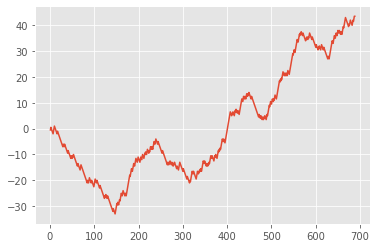

In [190]:
style.use("ggplot")

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('twitter-out.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    
    x=0
    y=0
    for line in lines:
        x+=1
        if "pos" in line:
            y+=1
        elif "neg" in line:
            y-=0.5
        xs.append(float(x))
        ys.append(float(y))
              
    ax1.clear()
    ax1.plot(xs, ys)
ani=animation.FuncAnimation(fig,animate,interval=1000)
plt.show()


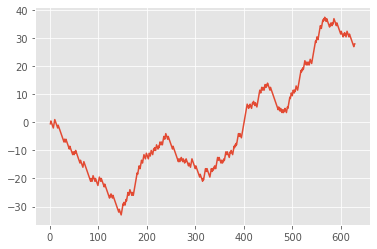

In [187]:
style.use("ggplot")

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('twitter-out.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    
    x=0
    y=0
    for line in lines:
        x+=1
        if "pos" in line:
            y+=1
        elif "neg" in line:
            y-=0.5
        xs.append(float(x))
        ys.append(float(y))
              
    ax1.clear()
    ax1.plot(xs, ys)
ani=animation.FuncAnimation(fig,animate,interval=1000)
plt.show()



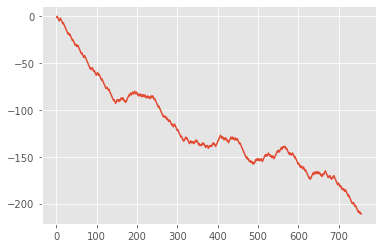

In [194]:
style.use("ggplot")

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('twitter-out.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    
    x=0
    y=0
    for line in lines:
        x+=1
        if "pos" in line:
            y+=1
        elif "neg" in line:
            y-=.5
        xs.append(float(x))
        ys.append(float(y))
              
    ax1.clear()
    ax1.plot(xs, ys)
ani=animation.FuncAnimation(fig,animate,interval=1000)
plt.show()


